# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('Loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning

## Checking Duplicates Data

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(614, 13)

No duplicate data

## Checking Data Types

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Checking Missing Values

In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Checking Distribution Plot from Null Column (Numerical column)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

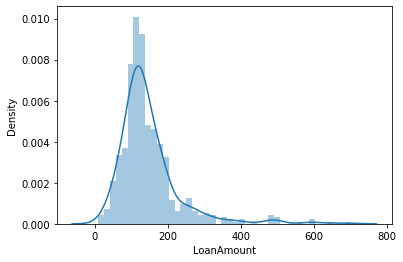

In [10]:
sns.distplot(df['LoanAmount'])

Because Loan amount variable has positive skewed, therefore the missing value is imputed with the median

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

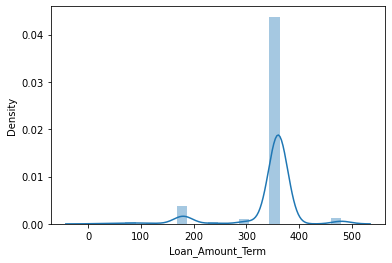

In [11]:
sns.distplot(df['Loan_Amount_Term'])

Because Loan amount term variable has negative skewed, therefore the missing value is imputed with the mode

In [12]:
#Rechecking Credit History data type
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Loan amount term is categorical column

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

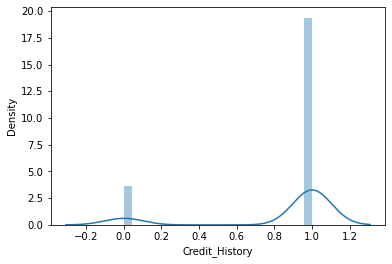

In [13]:
sns.distplot(df['Credit_History'])

Because Credit History variable has negative skewed, therefore the missing value is imputed with the mode

In [14]:
#Rechecking Credit History data type
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Credit history is categorical column

In [15]:
df['Credit_History'] = df['Credit_History'].astype('object')

In [16]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

### Impute Missing Value

In [17]:
#Separating categorical and numerical columns
Id_col     = ['Loan_ID']
target_col = ['Loan_Status']
cat_cols   = df.nunique()[df.nunique() <= 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

In [18]:
for col in df:
    if df[col].isnull().any():
        if col in cat_cols:
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Outlier Detection

In [21]:
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

### Applicant Income

In [22]:
outlier(df["ApplicantIncome"])

Number of Outlier 50
Outlier observation row:
9
34
54
67
102
106
115
119
126
128
130
138
144
146
155
171
183
185
191
199
254
258
271
278
284
308
324
333
369
370
409
424
432
438
443
467
475
478
483
487
493
506
509
525
533
534
561
572
594
604


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

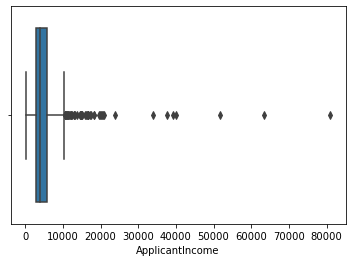

In [23]:
sns.boxplot(df['ApplicantIncome'])

In [24]:
Q1=df["ApplicantIncome"].quantile(0.25)
Q3=df["ApplicantIncome"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df["ApplicantIncome"]>upper_range),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N


In [25]:
#Replace outlier observations with upper bound and lower bound
df.loc[(df["ApplicantIncome"]>upper_range),"ApplicantIncome"]=upper_range
df.loc[(df["ApplicantIncome"]<lower_range),"ApplicantIncome"]=lower_range

In [26]:
outlier(df["ApplicantIncome"])

Number of Outlier 0


### Coapplicant Income

In [27]:
outlier(df["CoapplicantIncome"])

Number of Outlier 18
Outlier observation row:
9
12
38
122
135
177
180
253
349
372
402
417
444
506
513
523
581
600


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

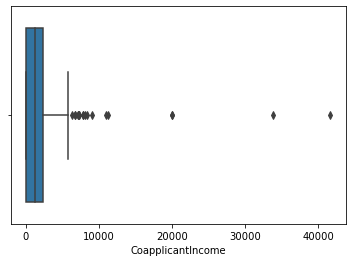

In [28]:
sns.boxplot(df['CoapplicantIncome'])

In [29]:
Q1=df["CoapplicantIncome"].quantile(0.25)
Q3=df["CoapplicantIncome"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df["CoapplicantIncome"]>upper_range),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,10171.25,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.00,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166.00,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137.00,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000.00,7750.0,290.0,360.0,1.0,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516.00,11300.0,495.0,360.0,0.0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400.00,7250.0,180.0,360.0,0.0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661.00,7101.0,279.0,180.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625.00,6250.0,187.0,360.0,1.0,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323.00,7873.0,380.0,300.0,1.0,Rural,Y


In [30]:
#Replace outlier observations with upper bound and lower bound
df.loc[(df["CoapplicantIncome"]>upper_range),"CoapplicantIncome"]=upper_range
df.loc[(df["CoapplicantIncome"]<lower_range),"CoapplicantIncome"]=lower_range

In [31]:
outlier(df["CoapplicantIncome"])

Number of Outlier 0


### Loan Amount

In [32]:
outlier(df["LoanAmount"])

Number of Outlier 41
Outlier observation row:
5
9
21
34
54
67
83
126
130
135
155
161
171
177
233
253
258
260
278
308
324
325
333
351
369
372
381
391
409
432
487
506
514
523
525
536
561
572
592
600
604


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

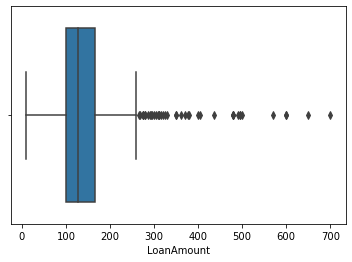

In [33]:
sns.boxplot(df['LoanAmount'])

In [34]:
Q1=df["LoanAmount"].quantile(0.25)
Q3=df["LoanAmount"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
df.loc[(df["LoanAmount"]>upper_range),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417.00,4196.000,267.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,10171.25,5743.125,349.0,360.0,1.0,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955.00,5625.000,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,10171.25,3000.000,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,10171.25,0.000,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10171.25,0.000,312.0,360.0,1.0,Urban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000.00,2250.000,265.0,360.0,1.0,Semiurban,N
126,LP001448,Male,Yes,3+,Graduate,No,10171.25,0.000,370.0,360.0,1.0,Rural,Y
130,LP001469,Male,No,0,Graduate,Yes,10171.25,0.000,650.0,480.0,1.0,Urban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000.00,5743.125,290.0,360.0,1.0,Semiurban,N


In [35]:
#Replace outlier observations with upper bound and lower bound
df.loc[(df["LoanAmount"]>upper_range),"LoanAmount"]=upper_range
df.loc[(df["LoanAmount"]<lower_range),"LoanAmount"]=lower_range

In [36]:
outlier(df["LoanAmount"])

Number of Outlier 0


In [37]:
outlier(df["Loan_Amount_Term"])

Number of Outlier 88
Outlier observation row:
14
16
62
66
68
72
75
78
84
91
94
98
100
109
115
128
130
133
142
144
155
164
168
171
172
179
182
186
189
202
228
231
241
242
245
247
248
253
262
282
286
293
298
313
315
333
334
355
358
363
366
372
373
375
378
385
393
400
401
408
429
435
444
451
453
461
466
471
476
495
497
500
504
513
516
539
540
546
554
573
575
585
590
591
593
600
605
610


In [38]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Loan Amount Term is categorical column

## Handle Inconsistent Data

None inconsistent data

# Feature Engineering

## Binning Variable

In [39]:
#Binning Loan amount term variables become categorical variables
from sklearn.preprocessing import KBinsDiscretizer

scaler=KBinsDiscretizer(n_bins=[5],encode="ordinal",strategy='uniform')
df[['Loan_Amount_Term']]=scaler.fit_transform(df[['Loan_Amount_Term']])

In [40]:
df.Loan_Amount_Term.value_counts()

3.0    539
1.0     47
4.0     15
0.0      9
2.0      4
Name: Loan_Amount_Term, dtype: int64

## Encoding Variables

In [41]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns was done while imputing missing values

#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()

#multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Label encoding for nominal multi value columns
df = pd.get_dummies(data = df,columns = multi_cols,drop_first=True)

In [42]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Loan_Amount_Term_1.0,Loan_Amount_Term_2.0,Loan_Amount_Term_3.0,Loan_Amount_Term_4.0,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849.0,0.0,128.0,1,1,0,0,0,0,0,1,0,0,1
1,LP001003,1,1,0,0,4583.0,1508.0,128.0,1,0,1,0,0,0,0,1,0,0,0
2,LP001005,1,1,0,1,3000.0,0.0,66.0,1,1,0,0,0,0,0,1,0,0,1
3,LP001006,1,1,1,0,2583.0,2358.0,120.0,1,1,0,0,0,0,0,1,0,0,1
4,LP001008,1,0,0,0,6000.0,0.0,141.0,1,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,2900.0,0.0,71.0,1,1,0,0,0,0,0,1,0,0,0
610,LP002979,1,1,0,0,4106.0,0.0,40.0,1,1,0,0,1,1,0,0,0,0,0
611,LP002983,1,1,0,0,8072.0,240.0,253.0,1,1,1,0,0,0,0,1,0,0,1
612,LP002984,1,1,0,0,7583.0,0.0,187.0,1,1,0,1,0,0,0,1,0,0,1


# Data Partition

In [43]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(df,test_size = .20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
cols    = [i for i in df.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

# SMOTE

In [44]:
train_Y['Loan_Status'].value_counts()

1    336
0    155
Name: Loan_Status, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=target_col)

In [46]:
#Proportion after smote
train_smote_Y['Loan_Status'].value_counts()

1    336
0    336
Name: Loan_Status, dtype: int64

# Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
train_smote_X_2 = train_smote_X
test_X_2 = test_X
train_smote_X_2[num_cols] = ss.fit_transform(train_smote_X_2[num_cols])
test_X_2[num_cols] = ss.transform(test_X_2[num_cols])

<ipython-input-47-680a6133e3e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X_2[num_cols] = ss.transform(test_X_2[num_cols])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


# Logistic Regression

## First method

In [48]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver = 'liblinear',
                                penalty = 'l1')
classifier.fit(train_smote_X, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [49]:
#Predict test set
y_pred = classifier.predict(test_X)

In [50]:
#Evaluate model using confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(test_Y, y_pred)
print(classification_report(test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        37
           1       0.81      0.93      0.86        86

    accuracy                           0.80       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.79      0.80      0.78       123



<AxesSubplot:xlabel='Predict', ylabel='Actual'>

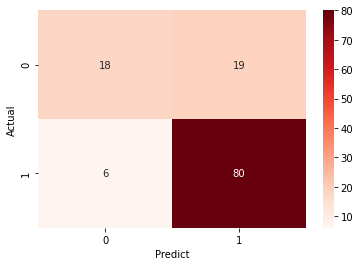

In [51]:
#Seaborn for CM
cm_label = pd.DataFrame(cm, columns = np.unique(test_Y),
                        index = np.unique(test_Y))
cm_label.index.name = 'Actual'
cm_label.columns.name = 'Predict'
sns.heatmap(cm_label, annot=True, cmap = 'Reds', fmt = 'g')

## Second Method

without feature scalling so just using train_smote_x instead of train_smote_x2

In [52]:
import statsmodels.api as sm 
exog = sm.add_constant(train_smote_X)
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.414117
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      654
Method:                           MLE   Df Model:                           17
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.4026
Time:                        19:28:31   Log-Likelihood:                -278.29
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 3.050e-69
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.9599      0.748     -9.305      0.000      -8.426   

In [53]:
labels = ['Education']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.414124
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      655
Method:                           MLE   Df Model:                           16
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.4025
Time:                        19:28:32   Log-Likelihood:                -278.29
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 6.214e-70
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.9590      0.748     -9.305      0.000      -8.425   

In [54]:
labels = ['Education', 'CoapplicantIncome']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.414145
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      656
Method:                           MLE   Df Model:                           15
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.4025
Time:                        19:28:32   Log-Likelihood:                -278.31
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 1.235e-70
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.9675      0.747     -9.330      0.000      -8.431   

In [55]:
labels = ['Education', 'CoapplicantIncome', 'ApplicantIncome']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.414163
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      657
Method:                           MLE   Df Model:                           14
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.4025
Time:                        19:28:32   Log-Likelihood:                -278.32
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 2.366e-71
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.9726      0.746     -9.347      0.000      -8.435   

In [56]:
labels = ['Education', 'CoapplicantIncome', 'ApplicantIncome', 'Dependents_1']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.414215
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      658
Method:                           MLE   Df Model:                           13
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.4024
Time:                        19:28:32   Log-Likelihood:                -278.35
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 4.459e-72
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.9711      0.746     -9.347      0.000      -8.433   

In [57]:
labels = ['Education', 'CoapplicantIncome', 'ApplicantIncome', 'Dependents_1','Loan_Amount_Term_2.0']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.414556
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      659
Method:                           MLE   Df Model:                           12
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.4019
Time:                        19:28:32   Log-Likelihood:                -278.58
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 9.741e-73
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.8513      0.713     -9.609      0.000      -8.249   

In [58]:
labels = ['Education', 'CoapplicantIncome', 'ApplicantIncome', 'Dependents_1','Loan_Amount_Term_2.0', 'Dependents_3+']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.415115
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      660
Method:                           MLE   Df Model:                           11
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.4011
Time:                        19:28:32   Log-Likelihood:                -278.96
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 2.349e-73
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.8389      0.711     -9.616      0.000      -8.233   

In [59]:
labels = ['Education', 'CoapplicantIncome', 'ApplicantIncome', 'Dependents_1','Loan_Amount_Term_2.0', 'Dependents_3+',
         'Loan_Amount_Term_4.0']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.416405
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      661
Method:                           MLE   Df Model:                           10
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.3993
Time:                        19:28:32   Log-Likelihood:                -279.82
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 8.725e-74
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.5393      0.659     -9.924      0.000      -7.831   

In [60]:
labels = ['Education', 'CoapplicantIncome', 'ApplicantIncome', 'Dependents_1','Loan_Amount_Term_2.0', 'Dependents_3+',
         'Loan_Amount_Term_4.0', 'Self_Employed']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.417902
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      662
Method:                           MLE   Df Model:                            9
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.3971
Time:                        19:28:32   Log-Likelihood:                -280.83
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 3.535e-74
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.5165      0.658     -9.911      0.000      -7.805   

In [61]:
labels = ['Education', 'CoapplicantIncome', 'ApplicantIncome', 'Dependents_1','Loan_Amount_Term_2.0', 'Dependents_3+',
         'Loan_Amount_Term_4.0', 'Self_Employed', 'Gender']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.419856
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      663
Method:                           MLE   Df Model:                            8
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.3943
Time:                        19:28:33   Log-Likelihood:                -282.14
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 1.829e-74
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.2480      0.629     -9.930      0.000      -7.481   

In [62]:
labels = ['Education', 'CoapplicantIncome', 'ApplicantIncome', 'Dependents_1','Loan_Amount_Term_2.0', 'Dependents_3+',
         'Loan_Amount_Term_4.0', 'Self_Employed', 'Gender', 'Property_Area_Urban']
exog = sm.add_constant(train_smote_X.drop(labels=labels,axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.422412
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  672
Model:                          Logit   Df Residuals:                      664
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                  0.3906
Time:                        19:28:33   Log-Likelihood:                -283.86
converged:                       True   LL-Null:                       -465.79
Covariance Type:            nonrobust   LLR p-value:                 1.322e-74
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.1268      0.621     -9.861      0.000      -7.345   

### Evaluation

In [63]:
pred=log_reg.predict(sm.add_constant(test_X.drop(labels=labels,axis=1)))

In [64]:
pred

94     0.883716
355    0.622267
403    0.818718
68     0.293670
122    0.040169
         ...   
204    0.948953
150    0.013799
271    0.700638
182    0.935780
107    0.518321
Length: 123, dtype: float64

In [65]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ",accuracy_score(test_Y,np.round(pred)))

Accuracy for Logreg on test data:  0.8048780487804879


In [66]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, np.round(pred))
CF

array([[18, 19],
       [ 5, 81]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, np.round(pred), target_names=target_names))

              precision    recall  f1-score   support

          No       0.78      0.49      0.60        37
         Yes       0.81      0.94      0.87        86

    accuracy                           0.80       123
   macro avg       0.80      0.71      0.74       123
weighted avg       0.80      0.80      0.79       123



# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knnc=KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [2,3,4,5,6,7,8],
    'metric': ['euclidean','manhatan', 'minkowski']
}

In [69]:
from sklearn.model_selection import GridSearchCV
CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid, cv= 2)
CV_knnc.fit(train_smote_X_2, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatan', 'minkowski'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8]})

In [70]:
CV_knnc.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

## Evaluation

In [71]:
CV_knnc.predict(test_X)
pred=CV_knnc.predict(test_X)
print("Accuracy for KNN on CV data: ",accuracy_score(test_Y,pred))

Accuracy for KNN on CV data:  0.7235772357723578


In [72]:
CF=confusion_matrix(test_Y, pred)
CF

array([[26, 11],
       [23, 63]], dtype=int64)

In [73]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.53      0.70      0.60        37
         Yes       0.85      0.73      0.79        86

    accuracy                           0.72       123
   macro avg       0.69      0.72      0.70       123
weighted avg       0.75      0.72      0.73       123



# SVM

In [74]:
from sklearn.svm import SVC
svm=SVC()
param_grid = { 
    "C" : [0.1, 1],
    "gamma" : [0.1, 1],
    "kernel":["linear","rbf"]
}

In [75]:
from sklearn.model_selection import GridSearchCV
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 2)
CV_svm.fit(train_smote_X_2, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [76]:
CV_svm.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

## Evaluation

In [77]:
pred=CV_svm.predict(test_X_2)

In [78]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ",accuracy_score(test_Y,pred))

Accuracy for Logreg on test data:  0.8130081300813008


# Decision Tree

In [79]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier()
param_grid = {"criterion":["gini","entropy"],
              'min_samples_split': [2,5,10,50,100],
             "max_depth":[3,4,5,6,7,8,9,10]}

In [80]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 2)
CV_dtc.fit(train_smote_X, train_smote_Y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 10, 50, 100]})

In [81]:
CV_dtc.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

## Evaluation

In [82]:
pred=CV_dtc.predict(test_X)

In [83]:
print("Accuracy for Decision Tree on CV data: ",accuracy_score(test_Y,pred))

Accuracy for Decision Tree on CV data:  0.7642276422764228


In [84]:
CF=confusion_matrix(test_Y, pred)
CF

array([[19, 18],
       [11, 75]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.63      0.51      0.57        37
         Yes       0.81      0.87      0.84        86

    accuracy                           0.76       123
   macro avg       0.72      0.69      0.70       123
weighted avg       0.75      0.76      0.76       123



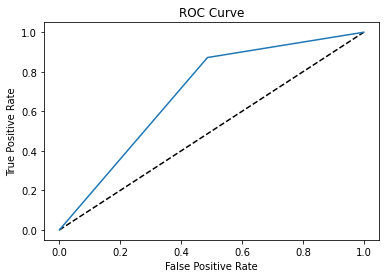

In [86]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred)

0.6928032683846637

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

In [97]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_smote_X, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [98]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}

## Evaluation

In [99]:
pred=CV_rfc.predict(test_X)

In [100]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred))

Accuracy for Random Forest on CV data:  0.8211382113821138


In [101]:
CF=confusion_matrix(test_Y, pred)
CF

array([[23, 14],
       [ 8, 78]], dtype=int64)

In [102]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.74      0.62      0.68        37
         Yes       0.85      0.91      0.88        86

    accuracy                           0.82       123
   macro avg       0.79      0.76      0.78       123
weighted avg       0.82      0.82      0.82       123



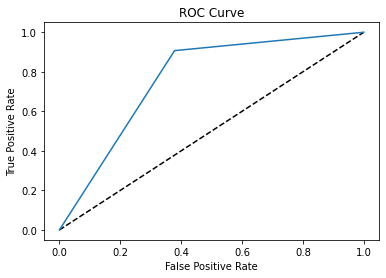

In [103]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [104]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred)

0.764299182903834